In [199]:
import warnings
warnings.filterwarnings('ignore')

In [200]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

RANDOM_STATE = 42

### Задание 1

На лекции вы познакомились с одним из методов оптимизации - методом градиентного спуска. В машинном обучении градиентный спуск используется для минимизации функции потерь при обучении моделей. Для лучшего понимания происходящего реализуем алгоритм руками.

Пусть на отрезке $[-2; 2]$ задана функция $y=x^4 + sin(x)$. Для поиска минимума этой функции реализуйте простейший алгоритм градиентного спуска. Начальное приближение возьмите равным 1. Выбрав темп обучения равным 0.1, найдите экстремум функции. Далее рассчитайте оптимальный темп обучения (такой, при котором алгоритм после первого же шага должен найти минимум функции).

Выберите все верные ответы из списка.

In [202]:
def f(x):
    return x**4+np.sin(x)


def gradient_f(x):
    return 4*x**3 + np.cos(x)

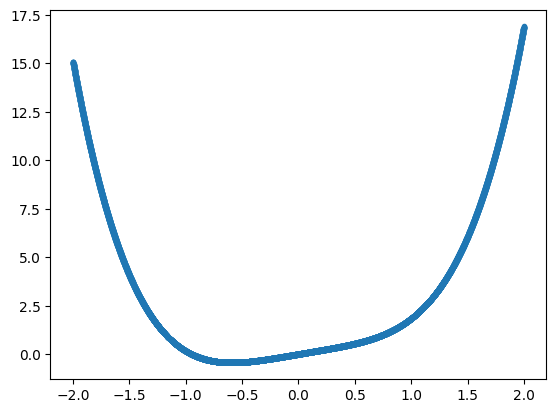

In [203]:
x = np.linspace(-2, 2, num=10000)
y = f(x)

plt.scatter(x, y, marker='.')
plt.show()

In [204]:
learning_rate = 0.35063  # темп обучения
iter = 1000  # базовое количество итераций

x0 = 1  # начальное приближение

In [205]:
for i in range (iter):
    Grad = gradient_f(x0)
    x0 = x0 - learning_rate * Grad
    y = f(x0)

    if i < 10:
        print ("x:", x0, ", y:", y)

x: -0.591966197506546 , y: -0.4351967748732224
x: -0.5919972480851261 , y: -0.43519677532674417
x: -0.5919764391946246 , y: -0.43519677553038316
x: -0.5919903850658159 , y: -0.4351967756218615
x: -0.5919810389609522 , y: -0.435196775662943
x: -0.5919873025536286 , y: -0.43519677568139564
x: -0.5919831048565061 , y: -0.435196775689683
x: -0.5919859180669494 , y: -0.43519677569340526
x: -0.5919840327213264 , y: -0.4351967756950771
x: -0.5919852962389921 , y: -0.43519677569582804


### Задание 2

Рассмотрим набор данных о заболевании раком. Здесь представлены два различных типа рака и необходимо отделить один от другого. Для этого разделите набор данных на тренировочную и тестовую выборки, постройте логистическую регрессию и выполните предсказания. Рассчитав коэффициенты модели, определите признак, который оказывает наиболее сильное влияние на наличие рака типа `'B'` у пациента. В качестве ответа сдайте название признака без кавычек.

In [207]:
# Считайте набор данных из файла Cancer_Data.csv
data = pd.read_csv('Cancer_Data.csv').drop(['id', 'Unnamed: 32'], axis=1)
data.shape

(569, 31)

In [208]:
# Закодируйте значения в колонке с целевой переменной. Рак типа B - класс 1, рак типа M - класс 0
# ваш код здесь
data['diagnosis'] = data['diagnosis'].map({'B':1, 'M':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [209]:
# Разделите набор на тренировочную и тестовую выборки. размер тестовой выборки - 0.4, стратификация по целевой переменной, перемешивание включено,
# random_state=RANDOM_STATE
x, y = data.drop(columns = 'diagnosis'), data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify = data[["diagnosis"]], shuffle = True, random_state=RANDOM_STATE)
X_train.reset_index(drop=True)
X_test.reset_index(drop=True)
y_train.reset_index(drop=True)
y_test.reset_index(drop=True)

0      1
1      1
2      1
3      1
4      1
      ..
223    1
224    1
225    0
226    1
227    1
Name: diagnosis, Length: 228, dtype: int64

In [210]:
# Создайте модель логистической регрессии и подберите ее оптимальные параметры с помощью GridSearchCV. Целевая метрика - ROC-AUC, количество фолдов 10
log_reg = LogisticRegression(random_state = RANDOM_STATE)

params = {
    'C' : [0.1, 0.3, 0.5, 0.7, 1.0]
}

clf = GridSearchCV(log_reg, params,  cv=10, scoring='roc_auc').fit(X_train, y_train)

best_params = clf.best_params_
print("Оптимальные параметры:", best_params)

Оптимальные параметры: {'C': 1.0}


In [211]:
# Обучите модель логистической регрессии с лучшими параметрами на тренировочной выборке и выполните предсказания на тестовой
model = clf.best_estimator_
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        85
           1       0.93      0.99      0.96       143

    accuracy                           0.95       228
   macro avg       0.96      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228

0.9376799670917317


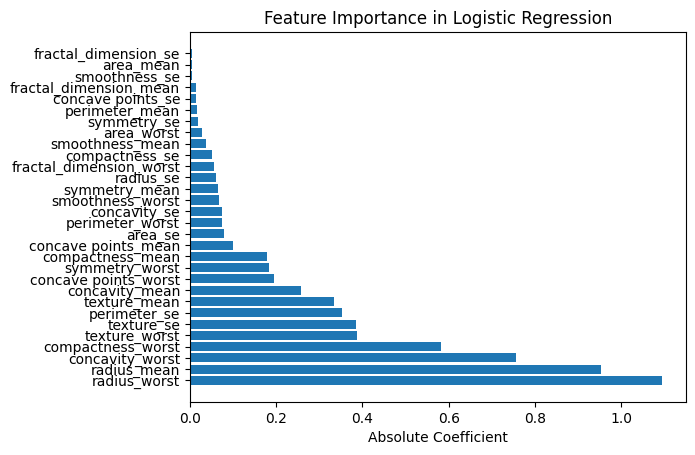

In [212]:
# Рассчитав коэффициенты модели, определите признак, который оказывает наиболее сильное влияние на наличие рака типа `'B'` у пациента
coefs = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Задание 3

Давайте интерпретируем коэффициенты логистической регрессии. Как при изменении коэффициента изменится вероятность того, что у пациента рак типа 'B'? Рассчитать предельный эффект на вероятность symmetry_se для среднего по выборке человека. В качестве ответа сдайте значение предельного эффекта для среднего по выборке, округлив его до 4-х знаков (десятичный разделитель - точка)

In [214]:
# Используя np.dot (и не забывая про константу) вычислите значение суммы произведения коэффициентов на среднее значение признака
lin_combo_at_avg = np.dot(np.transpose(model.coef_[0]),X_train.mean().values)
lin_combo_at_avg

-1.6067520222044003

In [215]:
# Вычислите и запишите формулу производную вероятности от признака symmetry_se
dp_dsymmetry_se = (X_train['symmetry_se'].mean()) * np.exp(-lin_combo_at_avg) / (1 + np.exp(-lin_combo_at_avg))**2

In [216]:
# Считаем предельный эффект на вероятность для symmetry_se, используя формулу dp_dsymmetry_se и принимая значения всех признаков равным средним.
# Здесь вам пригодиться lin_combo_at_avg
marg_effect_sym_se = dp_dsymmetry_se
marg_effect_sym_se

0.002889993772354682

### Задание 4

Постройте матрицу ошибок и рассчитайте необходимые метрики. Выберите все верные ответы в списке.

(228,)


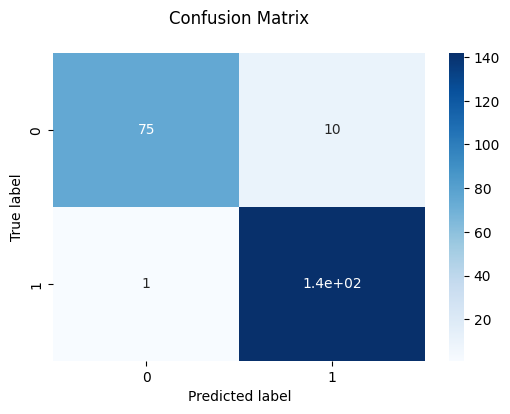

In [218]:
cf_matrix = confusion_matrix(y_test, pred)
print (y_test.shape)
plt.figure(figsize=(6, 4))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

### Задание 5

Выполните предсказания на тестовой выборке и рассчитайте значение метрики AUC-ROC, а также для наглядности постройте ROC-кривую.

При разных порогах по вероятности (0.25, 0.5, 0.75) рассчитайте значения метрик (точность, полнота, F1-мера, ROC-AUC) и выберите все верные ответы.

In [220]:
# ваш код здесь

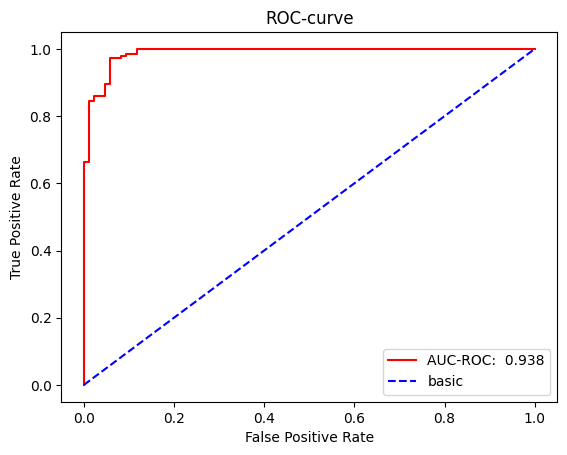

In [221]:
pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.plot(fpr, tpr, c='r', label=f'AUC-ROC: {roc_auc_score(y_test, pred): .3f}')
plt.plot(fpr, fpr, linestyle='dashed', c='b', label='basic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
plt.show()

In [222]:
thresholds = [0.25, 0.5, 0.75]
for threshold in thresholds:
    y_pred = (pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Порог: {threshold}")
    print(f"Точность: {accuracy:.3f}")
    print("Отчет о классификации:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, pred_proba):.3f}")
    print("--------------------------------------------------------")

Порог: 0.25
Точность: 0.934
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        85
           1       0.91      1.00      0.95       143

    accuracy                           0.93       228
   macro avg       0.95      0.91      0.93       228
weighted avg       0.94      0.93      0.93       228

ROC-AUC: 0.988
--------------------------------------------------------
Порог: 0.5
Точность: 0.952
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        85
           1       0.93      0.99      0.96       143

    accuracy                           0.95       228
   macro avg       0.96      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228

ROC-AUC: 0.988
--------------------------------------------------------
Порог: 0.75
Точность: 0.961
Отчет о классификации:
              precision    recall  f1-score   supp

### Задание 6

Найти порог, при котором F1-мера будет принимать максимальное значение.

In [224]:
# Порог надо искать среди чисел от 0 до 1 с шагом 0.001
best_thresh = 0
best_f1 = 0

for threshold in np.arange(0, 1, 0.001):
    y_pred = (pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = threshold

print (best_thresh, best_f1)

# ваш код здесь

0.739 0.9686411149825784


### Задание 7

Если для исследователя точность в 4 раза важнее полноты, то какой порог нужно выбрать для максимизации F-меры (перебор порога делать, как в предыдущем задании)? Рассчитайте также взвешанное значение F-меры в этом случае. Выберите все верные ответы из списка.

В этой [статье](https://habr.com/ru/companies/ods/articles/328372/) приведена формула взвешанной F-меры: $F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\beta^2 \cdot precision + recall}$

In [226]:
# Тут процедура аналогичная, только вместо F1-меры надо считать взвешенную F-меру
from sklearn.metrics import fbeta_score
best_thresh = 0
best_f1 = 0

thresh = 0
for threshold in np.arange(0, 1, 0.001):
    y_pred = (pred_proba >= threshold).astype(int)
    f1 = fbeta_score(y_test,y_pred,beta=0.25)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = threshold
print("best thresh",best_thresh)
print("best f1",best_f1)

best thresh 0.917
best f1 0.9812409812409812


### Задание 8

Вернемся к предсказаниям нашей логистической регрессии. Воспользуемся метрикой gini для сравнения нашей модели со случайной. Подробнее про метрику можно почитать [здесь](https://habr.com/ru/companies/ods/articles/350440/). Постройте случайную модель (используя наш random seed из ноутбука) и посчитайте разность нашего gini и gini случайной модели. Выберите правильный ответ.

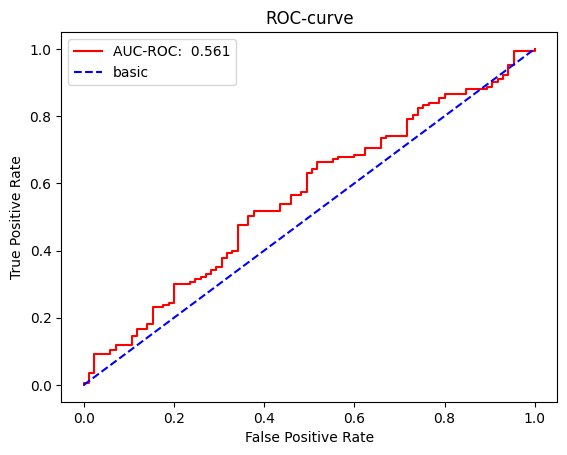

In [228]:
rng = np.random.RandomState(RANDOM_STATE)
random_probs = rng.uniform(0, 1, 228)


fpr, tpr, thresholds = roc_curve(y_test, random_probs)

plt.plot(fpr, tpr, c='r', label=f'AUC-ROC: {roc_auc_score(y_test, random_probs): .3f}')
plt.plot(fpr, fpr, linestyle='dashed', c='b', label='basic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
plt.show()

In [229]:
gini_our = 2*roc_auc_score(y_test,pred)-1
gini_random = 2*roc_auc_score(y_test,random_probs)-1

In [230]:
gini_our - gini_random

0.7523652817770463